In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
np.random.seed(42)

In [5]:
data_directory = 'dataset_diabetes/'

In [6]:
diabetes = pd.read_csv(os.path.join(data_directory, 'diabetic_data.csv'))
diabetes_id = pd.read_csv(os.path.join(data_directory, 'IDs_mapping.csv'))

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
diabetes.shape

(101766, 50)

In [10]:
diabetes_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [12]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99d907cbd0>,
      dtype=object)

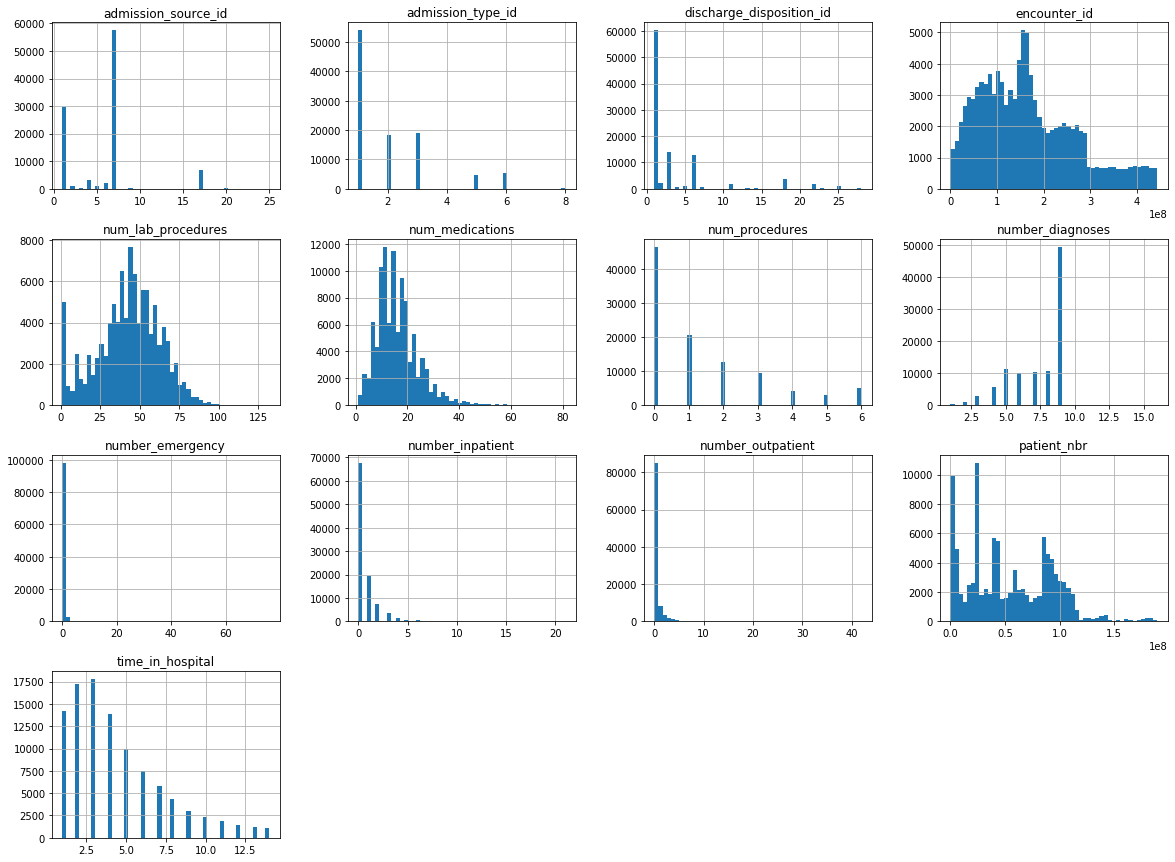

In [13]:
diabetes.hist(bins=50, figsize=(20, 15))

Columns to drop: encounter_id, patient_nbr, payer_code<br>
skeptical about: admission_type_id, discharge_disposition, encounter_id<br>
diag_1, diag_2, diag_3: too many categories<br>


Still not sure how we get an unbiased test set. 

In [14]:
#let's try stratified train test_split for age, gender, and race separately

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
def stratified_sampling(column):
    split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(diabetes, diabetes[column]):
        strat_train_set = diabetes.loc[train_index]
        strat_test_set = diabetes.loc[test_index]
    for set_ in [strat_train_set, strat_test_set]:
        print(set_[column].value_counts()/len(set_))
        print('-'*10)

In [26]:
stratified_sampling('gender')

Female             0.537587
Male               0.462389
Unknown/Invalid    0.000025
Name: gender, dtype: float64
----------
Female             0.537585
Male               0.462366
Unknown/Invalid    0.000049
Name: gender, dtype: float64
----------


In [27]:
stratified_sampling('race')

Caucasian          0.747789
AfricanAmerican    0.188768
?                  0.022331
Hispanic           0.020009
Other              0.014801
Asian              0.006301
Name: race, dtype: float64
----------
Caucasian          0.747765
AfricanAmerican    0.188759
?                  0.022354
Hispanic           0.020045
Other              0.014788
Asian              0.006289
Name: race, dtype: float64
----------


In [35]:
stratified_sampling('age')

[70-80)     0.256154
[60-70)     0.220926
[50-60)     0.169570
[80-90)     0.168980
[40-50)     0.095170
[30-40)     0.037095
[90-100)    0.027441
[20-30)     0.016288
[10-20)     0.006793
[0-10)      0.001585
Name: age, dtype: float64
----------
[70-80)     0.256166
[60-70)     0.220939
[50-60)     0.169549
[80-90)     0.169009
[40-50)     0.095166
[30-40)     0.037093
[90-100)    0.027464
[20-30)     0.016262
[10-20)     0.006780
[0-10)      0.001572
Name: age, dtype: float64
----------


In [49]:
#now let's see how the test set looks for non stratified sampling

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42)

In [52]:
for col in ['gender', 'race', 'age']:
    print(col, '*'*10)
    print(train_set[col].value_counts()/len(train_set))
    print('-'*10)
    print(test_set[col].value_counts()/len(test_set))

gender **********
Female             0.537267
Male               0.462708
Unknown/Invalid    0.000025
Name: gender, dtype: float64
----------
Female             0.538862
Male               0.461089
Unknown/Invalid    0.000049
Name: gender, dtype: float64
race **********
Caucasian          0.747691
AfricanAmerican    0.188240
?                  0.022405
Hispanic           0.020267
Other              0.015047
Asian              0.006350
Name: race, dtype: float64
----------
Caucasian          0.748158
AfricanAmerican    0.190872
?                  0.022060
Hispanic           0.019013
Other              0.013806
Asian              0.006092
Name: race, dtype: float64
age **********
[70-80)     0.256461
[60-70)     0.220594
[50-60)     0.168783
[80-90)     0.168734
[40-50)     0.095932
[30-40)     0.037218
[90-100)    0.027502
[20-30)     0.016398
[10-20)     0.006768
[0-10)      0.001609
Name: age, dtype: float64
----------
[70-80)     0.254938
[60-70)     0.222266
[50-60)     0.172693
[80

Alright, not bad! the test set looks representative enough. cool. let's drop the idea of stratified sampling.

Let's explore the training set and forget that we have a test set, for now.

In [53]:
diabetes = train_set.copy()

In [54]:
#let's look for correlations
corr_matrix = diabetes.corr()

In [59]:
corr_matrix

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.514508,-0.158658,-0.133966,-0.112098,-0.064575,-0.024343,-0.013457,0.076601,0.104213,0.084745,0.029318,0.266420
patient_nbr,0.514508,1.000000,-0.013086,-0.138138,-0.034054,-0.026424,0.016870,-0.015658,0.021069,0.102887,0.063339,0.010454,0.227744
admission_type_id,-0.158658,-0.013086,1.000000,0.083668,0.105952,-0.012250,-0.145419,0.129934,0.079568,0.026491,-0.017952,-0.036559,-0.116752
discharge_disposition_id,-0.133966,-0.138138,0.083668,1.000000,0.022103,0.165857,0.023729,0.014810,0.109112,-0.011426,-0.025100,0.021902,0.048710
admission_source_id,-0.112098,-0.034054,0.105952,0.022103,1.000000,-0.005072,0.050287,-0.136034,-0.054109,0.026503,0.058243,0.038406,0.070284
time_in_hospital,-0.064575,-0.026424,-0.012250,0.165857,-0.005072,1.000000,0.317835,0.192263,0.466202,-0.008298,-0.012391,0.071185,0.222527
num_lab_procedures,-0.024343,0.016870,-0.145419,0.023729,0.050287,0.317835,1.000000,0.059530,0.268858,-0.005223,-0.002111,0.041071,0.152229
num_procedures,-0.013457,-0.015658,0.129934,0.014810,-0.136034,0.192263,0.059530,1.000000,0.385442,-0.023273,-0.040415,-0.065869,0.073737
num_medications,0.076601,0.021069,0.079568,0.109112,-0.054109,0.466202,0.268858,0.385442,1.000000,0.043964,0.011328,0.064388,0.263512
number_outpatient,0.104213,0.102887,0.026491,-0.011426,0.026503,-0.008298,-0.005223,-0.023273,0.043964,1.000000,0.090420,0.104950,0.093414


In [58]:
corr_matrix['time_in_hospital']

encounter_id               -0.064575
patient_nbr                -0.026424
admission_type_id          -0.012250
discharge_disposition_id    0.165857
admission_source_id        -0.005072
time_in_hospital            1.000000
num_lab_procedures          0.317835
num_procedures              0.192263
num_medications             0.466202
number_outpatient          -0.008298
number_emergency           -0.012391
number_inpatient            0.071185
number_diagnoses            0.222527
Name: time_in_hospital, dtype: float64

In [61]:
from pandas.plotting import scatter_matrix

In [67]:
attributes = ['time_in_hospital', 'discharge_disposition_id', 'num_lab_procedures', 'num_procedures',
              'num_medications', 'number_diagnoses']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99d049bc90>,
      dtype=object)

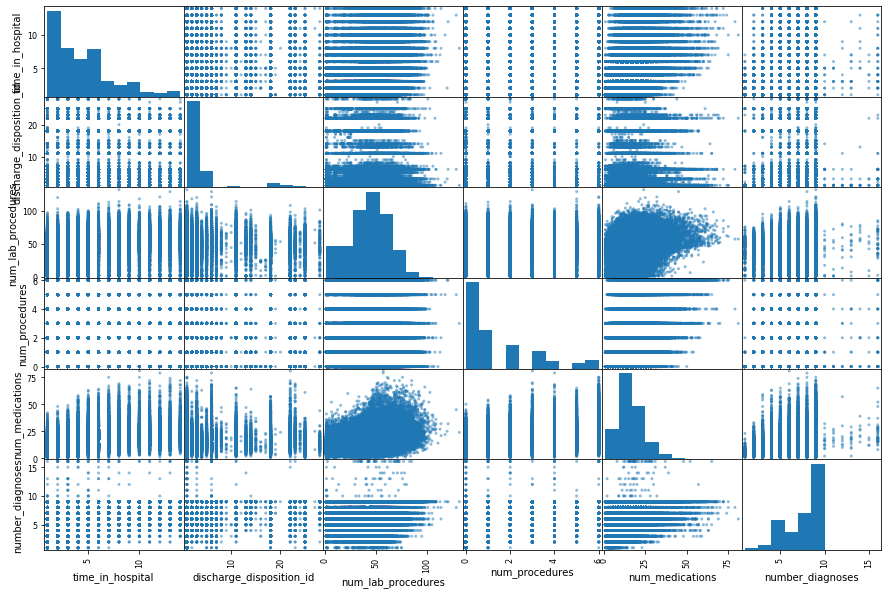

In [70]:
scatter_matrix(diabetes[attributes], figsize=(15, 10))

In [72]:
#DATA CLEANING

In [77]:
diabetes.shape

(81412, 50)

In [73]:
diabetes.replace('?',np.nan,inplace=True)

In [75]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81412 entries, 24079 to 15795
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              81412 non-null  int64 
 1   patient_nbr               81412 non-null  int64 
 2   race                      79588 non-null  object
 3   gender                    81412 non-null  object
 4   age                       81412 non-null  object
 5   weight                    2560 non-null   object
 6   admission_type_id         81412 non-null  int64 
 7   discharge_disposition_id  81412 non-null  int64 
 8   admission_source_id       81412 non-null  int64 
 9   time_in_hospital          81412 non-null  int64 
 10  payer_code                49277 non-null  object
 11  medical_specialty         41443 non-null  object
 12  num_lab_procedures        81412 non-null  int64 
 13  num_procedures            81412 non-null  int64 
 14  num_medications   

In [83]:
diabetes.drop(['encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty'], axis = 1, inplace=True)

In [84]:
diabetes.dropna(subset=['race'], inplace = True)

In [85]:
diabetes.shape

(79588, 45)

In [90]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79588 entries, 24079 to 15795
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      79588 non-null  object
 1   gender                    79588 non-null  object
 2   age                       79588 non-null  object
 3   admission_type_id         79588 non-null  int64 
 4   discharge_disposition_id  79588 non-null  int64 
 5   admission_source_id       79588 non-null  int64 
 6   time_in_hospital          79588 non-null  int64 
 7   num_lab_procedures        79588 non-null  int64 
 8   num_procedures            79588 non-null  int64 
 9   num_medications           79588 non-null  int64 
 10  number_outpatient         79588 non-null  int64 
 11  number_emergency          79588 non-null  int64 
 12  number_inpatient          79588 non-null  int64 
 13  diag_1                    79573 non-null  object
 14  diag_2            

In [87]:
#figure out a way to transform diag_1, diag_2, and diag_3 using Table 2 from the HA1C reference paper.
#these three attributes also have several missing values

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
imputer = SimpleImputer(strategy='median') #could be useful if there are missing values in the test_set

In [94]:
diabetes_num = diabetes[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                         'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]

In [96]:
imputer.fit(diabetes_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [97]:
imputer.statistics_

array([ 1.,  1.,  7.,  4., 44.,  1., 15.,  0.,  0.,  0.,  8.])

In [99]:
diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
24079,Caucasian,Female,[70-80),1,1,7,4,48,0,11,0,0,0,276,402,428,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
98079,Caucasian,Male,[50-60),1,1,7,1,42,0,5,0,0,0,427,250,278,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
6237,Caucasian,Male,[80-90),1,1,7,4,44,0,10,0,0,0,599,788,599,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
72208,Caucasian,Male,[80-90),1,3,7,3,54,0,8,0,0,0,331,309,331,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
33075,AfricanAmerican,Female,[70-80),1,11,7,11,35,3,23,0,0,1,38,486,403,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [100]:
#what are we predicting? readmission, time_in_hospital

In [101]:
#tranform categorical attributes using OrdinalEncoder and OneHotEncoder

In [105]:
diabetes[:50]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
24079,Caucasian,Female,[70-80),1,1,7,4,48,0,11,0,0,0,276,402,428,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
98079,Caucasian,Male,[50-60),1,1,7,1,42,0,5,0,0,0,427,250,278,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
6237,Caucasian,Male,[80-90),1,1,7,4,44,0,10,0,0,0,599,788,599,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
72208,Caucasian,Male,[80-90),1,3,7,3,54,0,8,0,0,0,331,309,331,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
33075,AfricanAmerican,Female,[70-80),1,11,7,11,35,3,23,0,0,1,38,486,403,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
81022,Caucasian,Female,[60-70),1,6,7,6,45,0,24,0,0,3,491,427,427,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
79358,Caucasian,Male,[80-90),1,6,7,8,57,5,19,0,1,1,537,584,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
60741,Caucasian,Female,[30-40),1,1,7,1,56,0,4,0,0,0,780,276,250,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
62297,AfricanAmerican,Female,[70-80),2,2,7,5,36,6,12,0,1,1,428,414,413,9,None,None,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
33019,AfricanAmerican,Male,[60-70),6,2,7,5,73,3,16,0,0,3,596,496,599,6,>200,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
